In [277]:
# %matplotlib inline
%matplotlib notebook

In [291]:
import pandas as pd
import numpy as np
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt


In [279]:
# Dependencies
from math import sqrt

from statistics import mean


def variance(arr):
    _mean = mean(arr)
    normalized = [x - _mean for x in arr]
    squares = [x ** 2 for x in normalized]
    return sum(squares) / len(arr)


def standard_deviation(arr):
    return sqrt(variance(arr))


def z_score(arr, index):
    return (arr[index] - mean(arr)) / standard_deviation(arr)


# def z_scores(arr):
    return [z_score(arr, ind) for ind in range(0, len(arr))]


# def zipped_z_scores(arr):
    return list(zip(arr, z_scores(arr)))


In [196]:
#
def summarize(title, arr):
    print(f"Summarizing {title}")
    print(f"Variance: {variance(arr)}")
    print(f"Standard Deviation: {standard_deviation(arr)}")

In [197]:
# Read csv file
# The path to our CSV file with dropped Business Name dublicates
file = "../Resources/Final_Clean_Restaurants.csv"
original_df = pd.read_csv(file)
len(original_df['Name'])

19998

In [198]:
#Create a new category with cleaned #(without brakets and quotation marks) 
new_column = [original_df['Category'][row].replace("[", "").replace("]", "").replace("'", "").replace(" ", "") for row in original_df.index]
new_list = [category.split(',') for category in new_column]
original_df["Category list"] = new_list
original_df

,Unnamed: 0,Name,Category,Biz City,Biz Zip,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County,Category list
0,0,Railroad Station Bar and Grill,"['American (New)', 'Southern', 'Pubs']",Cloverdale,95425.0,38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma,"[American(New), Southern, Pubs]"
1,1,Hamburger Ranch & Bar-B-Que,"['Barbeque', 'Burgers']",Cloverdale,95425.0,38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma,"[Barbeque, Burgers]"
2,2,Trading Post,"['Bakeries', 'American (New)', 'Bars']",Cloverdale,95425.0,38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma,"[Bakeries, American(New), Bars]"
3,3,Cloverdale Ale Company,"['Pubs', 'Beer Bar', 'American (Traditional)']",Cloverdale,95425.0,38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma,"[Pubs, BeerBar, American(Traditional)]"
4,4,Piacere Italiano Steak and Seafood,"['Italian', 'Steakhouses', 'Seafood']",Cloverdale,95425.0,38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma,"[Italian, Steakhouses, Seafood]"
5,5,Railroad Square Bar and Grill,['Restaurants'],Cloverdale,95425.0,38.802877,-123.015909,4.0,7,Unavailable,VmRLVJ4QPJCC3ZoxHCAdvA,Sonoma,[Restaurants]
6,6,Papa's Pizza Cafe,"['Pizza', 'Salad', 'Sandwiches']",Cloverdale,95425.0,38.805326,-123.017612,4.5,85,$$,bwp-KNxkgfQhsbaBYYvqdw,Sonoma,"[Pizza, Salad, Sandwiches]"
7,7,MoE's Eagles Nest Deli,['Delis'],Cloverdale,95425.0,38.805669,-123.017421,3.5,61,$,mweczDf0CB-zt4JsremEPQ,Sonoma,[Delis]
8,8,La Hacienda,['Mexican'],Cloverdale,95425.0,38.806535,-123.017846,3.5,83,$$,aPow7ctyoPiaMGzHhzfZvQ,Sonoma,[Mexican]
9,9,Picks Drive-In,"['Burgers', 'Ice Cream & Frozen Yogurt', 'Sand...",Cloverdale,95425.0,38.804752,-123.017062,3.5,167,$$,qqVysA8ns692wucr7ftr8w,Sonoma,"[Burgers, IceCream&FrozenYogurt, Sandwiches]"


In [199]:
# Remove ratings that lower than 3.5 
ratings_above3_5 = original_df.loc[(
    original_df["Rating"] >=3.5)]
ratings_above3_5.head()

,Unnamed: 0,Name,Category,Biz City,Biz Zip,Biz Lat,Biz Lng,Rating,Review Count,Price,Yelp ID,County,Category list
0,0,Railroad Station Bar and Grill,"['American (New)', 'Southern', 'Pubs']",Cloverdale,95425.0,38.803078,-123.015378,4.0,223,$$,slg-wyyA57sZSMWmNshl-Q,Sonoma,"[American(New), Southern, Pubs]"
1,1,Hamburger Ranch & Bar-B-Que,"['Barbeque', 'Burgers']",Cloverdale,95425.0,38.817818,-123.023628,4.0,381,$$,0Dj4fW3J3DJzrI51PLadRA,Sonoma,"[Barbeque, Burgers]"
2,2,Trading Post,"['Bakeries', 'American (New)', 'Bars']",Cloverdale,95425.0,38.805104,-123.016866,4.0,130,$$,6o26tulocbwnkZx89EVHkA,Sonoma,"[Bakeries, American(New), Bars]"
3,3,Cloverdale Ale Company,"['Pubs', 'Beer Bar', 'American (Traditional)']",Cloverdale,95425.0,38.805637,-123.015944,4.0,22,$$,wAbWk-do6kAUt3V9z8f9Wg,Sonoma,"[Pubs, BeerBar, American(Traditional)]"
4,4,Piacere Italiano Steak and Seafood,"['Italian', 'Steakhouses', 'Seafood']",Cloverdale,95425.0,38.810692,-123.020622,3.5,123,$$,wcRhJxjChvs7Q4nBft_c8A,Sonoma,"[Italian, Steakhouses, Seafood]"


In [231]:
#Check that the ratings are above 3.5
ratings_above3_5['Rating'].unique()

array([4. , 3.5, 4.5, 5. ])

In [273]:
# Check the number of bix in Counties
y = ratings_above3_5['County'].value_counts()
y

SF              4389
Alameda         3290
Santa Clara     2906
Contra Costa    1223
San Mateo       1114
Sonoma           731
Marin            425
Solano           407
Napa             207
Name: County, dtype: int64

In [202]:
len(ratings_above3_5['Name'])

14692

In [203]:
sf_df = ratings_above3_5.loc[ratings_above3_5["County"] == "SF", :]
sf_sd = alameda_df['Rating']
summarize("Ratings Standard Deviation", sf_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16452705074786567
Standard Deviation: 0.4056193421767084


In [204]:
# Filter the data for Alameda county
alameda_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Alameda", :]
alameda_sd = alameda_df['Rating']
summarize("Ratings Standard Deviation", alameda_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16452705074786567
Standard Deviation: 0.4056193421767084


In [205]:
# Filter the data for Alameda county
santa_clara_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Santa Clara", :]
santa_clara_sd = santa_clara_df['Rating']
summarize("Ratings Standard Deviation", santa_clara_sd)

Summarizing Ratings Standard Deviation
Variance: 0.15884917717763544
Standard Deviation: 0.3985588754219826


In [206]:
contra_costa_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Contra Costa", :]
contra_costa_sd = contra_costa_df['Rating']
summarize("Ratings Standard Deviation", contra_costa_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16879662024337097
Standard Deviation: 0.41084865856343133


In [207]:
san_mateo_df = ratings_above3_5.loc[ratings_above3_5["County"] == "San Mateo", :]
san_mateo_sd = san_mateo_df['Rating']
summarize("Ratings Standard Deviation", san_mateo_sd)

Summarizing Ratings Standard Deviation
Variance: 0.15347752933933917
Standard Deviation: 0.39176208256968814


In [208]:
sonoma_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Sonoma", :]
sonoma_sd = sonoma_df['Rating']
summarize("Ratings Standard Deviation", sonoma_sd)

Summarizing Ratings Standard Deviation
Variance: 0.16560433863998528
Standard Deviation: 0.4069451297656544


In [209]:
marin_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Marin", :]
marin_sd = marin_df['Rating']
summarize("Ratings Standard Deviation", marin_sd)

Summarizing Ratings Standard Deviation
Variance: 0.17496747404844223
Standard Deviation: 0.4182911355126262


In [210]:
solano_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Solano", :]
solano_sd = solano_df['Rating']
summarize("Ratings Standard Deviation", solano_sd)

Summarizing Ratings Standard Deviation
Variance: 0.17371067739618062
Standard Deviation: 0.4167861290832273


In [211]:
napa_df = ratings_above3_5.loc[ratings_above3_5["County"] == "Napa", :]
napa_sd = napa_df['Rating']
summarize("Ratings Standard Deviation", napa_sd)

Summarizing Ratings Standard Deviation
Variance: 0.1677285350883329
Standard Deviation: 0.4095467434717714


In [212]:
stats.f_oneway(alameda_sd, contra_costa_sd, marin_sd, napa_sd, san_mateo_sd, santa_clara_sd, sf_sd, solano_sd, sonoma_sd)

F_onewayResult(statistic=11.444096476996627, pvalue=2.572900645584845e-16)

In [133]:
# #Get the ratings data
box_whisker_ratings = original_df['Rating']


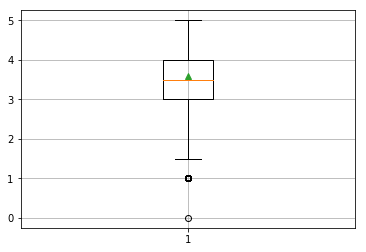

In [213]:
# Create box plot
plt.boxplot(box_whisker_ratings, showmeans=True)
plt.grid()
plt.show()

In [115]:
plt.savefig('box_whisker.png')   # save the figure to file
# plt.savefig("../Images/pymauceuticals.png")
# plt.show()

<Figure size 432x288 with 0 Axes>

In [165]:
# appr_cat_list = pd.read_csv('appr_cat_list.csv')
# rows = appr_cat_list.apply(lambda x: x.tolist())
# rows

In [180]:
approved_list = ['AcaiBowls','Afghan','African','American(New)','American(Traditional)','Arabian','Argentine','AsianFusion','Austrian','Bagels','Bakeries','Barbeque','Basque','Belgian','Brasseries','Brazilian','Breakfast&Brunch','British','Buffets','Burgers','Burmese','Cafes','Cajun/Creole','Cambodian','Cantonese','Caribbean','Cheesesteaks','ChickenShop','ChickenWings','Chinese','Colombian','ComfortFood','ConveyorBeltSushi','Creperies','Cuban','Cupcakes','Czech','Delis','Desserts','DimSum','Diners','DinnerTheater','Donuts','Empanadas','Ethiopian','Falafel','FastFood','Filipino','Fish&Chips','Fondue','French','Gastropubs','Gelato','German','Gluten-Free','Greek','Halal','Hawaiian','Himalayan/Nepalese','Honduran','HongKongStyleCafe','HotDogs','HotPot','IceCream&FrozenYogurt','Indian','Indonesian','Irish','Italian','Izakaya','Japanese','JapaneseCurry','Kebab','Korean','Kosher','Laotian','LatinAmerican','Lebanese','Live/RawFood','Malaysian','Mediterranean','Mexican','MiddleEastern','ModernEuropean','Mongolian','Moroccan','NewMexicanCuisine','Nicaraguan','Noodles','Pakistani','PanAsian','Pancakes','PastaShops','Patisserie/CakeShop','Persian/Iranian','Peruvian','Pizza','Poke','Polish','Polynesian','Portuguese','Pretzels','PuertoRican','Ramen','Russian','Salad','Salvadoran','Sandwiches','Scandinavian','Seafood','Senegalese','Shanghainese','Singaporean','Smokehouse','SoulFood','Soup','SouthAfrican','Southern','Spanish','Steakhouses','SushiBars','Syrian','Szechuan','Tacos','Taiwanese','Tapas/SmallPlates','TapasBars','Teppanyaki','Tex-Mex','Thai','Turkish','Vegan','Vegetarian','Vietnamese','Waffles','Wraps','Armenian','Chocolatiers&Shops','CustomCakes','Egyptian','Eritrean','Guamanian','Poutineries','Slovakian','Venezuelan','Bangladeshi','Catalan','Iberian','IrishPub','Sardinian','Sicilian','Somali','Tuscan','Ukrainian','Uzbek'
]

In [193]:
sf_unique_cat_list = []
sf_full_cat_list = []
# sf_non_approved = []
sf_rating = []
for row in sf_df["Category list"]:
    for i in row:
        if i in approved_cat_list:
            if i not in sf_unique_cat_list:
                sf_full_cat_list.append(i)
                sf_unique_cat_list.append(i)
            
#                 for row in sf_df['Rating']:
           
    else:
   

SyntaxError: unexpected EOF while parsing (<ipython-input-193-383a637d65a6>, line 15)